Kết quả so sánh:
MSE Linear Regression: 564004.39
MSE Ridge Regression: 569572.52
Hệ số Linear Regression: [300.03431105  33.22728529]
Hệ số Ridge Regression: [300.0352792   31.42657402]


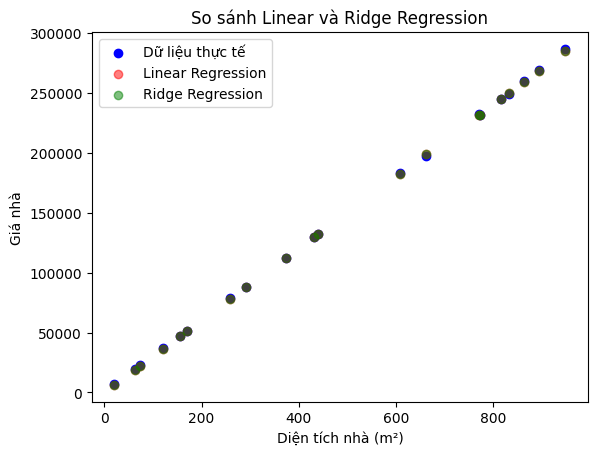

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Tạo dữ liệu giả lập với multicollinearity mạnh hơn
np.random.seed(42)
n_samples = 100

# Diện tích nhà (X1)
X1 = np.random.rand(n_samples, 1) * 1000  # Từ 0 đến 1000 m²
# Số phòng (X2) có tương quan rất cao với X1
X2 = X1 * 0.005 + np.random.randn(n_samples, 1) * 5  # Tăng tương quan, giảm nhiễu
X = np.hstack((X1, X2))  # Kết hợp X1 và X2

# Giá nhà (y) = 300 * X1 + 50 * X2 + nhiễu (giảm nhiễu)
y = 300 * X1 + 50 * X2 + np.random.randn(n_samples, 1) * 500  # Giảm nhiễu từ 1000 xuống 500

# 2. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Huấn luyện Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 4. Huấn luyện Ridge Regression với alpha lớn hơn
ridge_model = Ridge(alpha=100.0)  # Tăng alpha để điều chuẩn mạnh hơn
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 5. So sánh hiệu suất
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Kết quả so sánh:")
print(f"MSE Linear Regression: {mse_linear:.2f}")
print(f"MSE Ridge Regression: {mse_ridge:.2f}")
print(f"Hệ số Linear Regression: {linear_model.coef_.flatten()}")
print(f"Hệ số Ridge Regression: {ridge_model.coef_.flatten()}")

# 6. Vẽ biểu đồ
plt.scatter(X_test[:, 0], y_test, color='blue', label='Dữ liệu thực tế')
plt.scatter(X_test[:, 0], y_pred_linear, color='red', label='Linear Regression', alpha=0.5)
plt.scatter(X_test[:, 0], y_pred_ridge, color='green', label='Ridge Regression', alpha=0.5)
plt.xlabel('Diện tích nhà (m²)')
plt.ylabel('Giá nhà')
plt.title('So sánh Linear và Ridge Regression')
plt.legend()
plt.show()

Kết quả so sánh:
MSE Linear Regression (train): 4.12
MSE Linear Regression (test): 2.43
MSE Ridge Regression (train): 4.49
MSE Ridge Regression (test): 2.12
Hệ số Linear Regression: [5.34193429 2.51915324 2.09378345 0.7093372 ]
Hệ số Ridge Regression: [4.09951035 3.23720878 2.6573983  0.6841182 ]


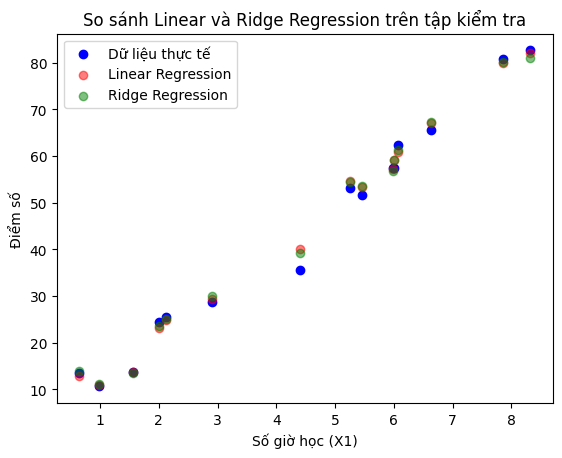

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Tạo dữ liệu giả lập với multicollinearity
np.random.seed(42)
n_samples = 50  # Số mẫu nhỏ để dễ gây overfitting
n_features = 4  # 4 đặc trưng

# Tạo các biến độc lập
X1 = np.random.rand(n_samples, 1) * 10  # Số giờ học (0-10 giờ)
X2 = X1 * 0.9 + np.random.randn(n_samples, 1) * 0.5  # Số giờ học nhóm, tương quan cao với X1
X3 = X1 * 0.8 + np.random.randn(n_samples, 1) * 0.7  # Số bài tập, tương quan cao với X1
X4 = np.random.rand(n_samples, 1) * 8  # Số giờ ngủ (0-8 giờ), ít tương quan hơn

# Kết hợp thành ma trận đặc trưng
X = np.hstack((X1, X2, X3, X4))

# Điểm số (y) = 5 * X1 + 2 * X2 + 3 * X3 + 1 * X4 + nhiễu
y = 5 * X1 + 2 * X2 + 3 * X3 + 1 * X4 + np.random.randn(n_samples, 1) * 2

# 2. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Huấn luyện Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# 4. Huấn luyện Ridge Regression
ridge_model = Ridge(alpha=10.0)  # alpha lớn để điều chuẩn mạnh
ridge_model.fit(X_train, y_train)
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# 5. So sánh hiệu suất
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)

print("Kết quả so sánh:")
print(f"MSE Linear Regression (train): {mse_linear_train:.2f}")
print(f"MSE Linear Regression (test): {mse_linear_test:.2f}")
print(f"MSE Ridge Regression (train): {mse_ridge_train:.2f}")
print(f"MSE Ridge Regression (test): {mse_ridge_test:.2f}")
print(f"Hệ số Linear Regression: {linear_model.coef_.flatten()}")
print(f"Hệ số Ridge Regression: {ridge_model.coef_.flatten()}")

# 6. Vẽ biểu đồ so sánh trên tập kiểm tra (dựa trên X1)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Dữ liệu thực tế')
plt.scatter(X_test[:, 0], y_pred_linear_test, color='red', label='Linear Regression', alpha=0.5)
plt.scatter(X_test[:, 0], y_pred_ridge_test, color='green', label='Ridge Regression', alpha=0.5)
plt.xlabel('Số giờ học (X1)')
plt.ylabel('Điểm số')
plt.title('So sánh Linear và Ridge Regression trên tập kiểm tra')
plt.legend()
plt.show()